In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [5]:
db_file = "sales_data.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [6]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (id INTEGER PRIMARY KEY AUTOINCREMENT,product TEXT,quantity INTEGER,price REAL)
""")
conn.commit()

In [7]:
cursor.execute("SELECT COUNT(*) FROM sales")

In [8]:
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Almond Milk', 15, 2.5),
        ('Choco Cookies', 20, 1.8),
        ('Organic Honey', 10, 4.0),
        ('Peanut Butter', 8, 3.5),
        ('Granola Bars', 25, 1.2),
        ('Oatmeal Pack', 12, 2.0),
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()


In [20]:
#Finding revenue by product
query1 = """
SELECT product,
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales group by product
"""
df1 = pd.read_sql_query(query1, conn)
print("\nOverall Sales Summary:")
print(df1)


Overall Sales Summary:
         product  total_quantity_sold  total_revenue
0    Almond Milk                   15           37.5
1  Choco Cookies                   20           36.0
2   Granola Bars                   25           30.0
3   Oatmeal Pack                   12           24.0
4  Organic Honey                   10           40.0
5  Peanut Butter                    8           28.0


In [10]:
query2 = """
SELECT 
    product,
    COUNT(*) AS transactions,
    AVG(price) AS avg_price,
    SUM(quantity) AS total_units
FROM sales
GROUP BY product
"""
df2 = pd.read_sql_query(query2, conn)
print("\nAverage Price and Total Units Sold per Product:")
print(df2)


Average Price and Total Units Sold per Product:
         product  transactions  avg_price  total_units
0    Almond Milk             1        2.5           15
1  Choco Cookies             1        1.8           20
2   Granola Bars             1        1.2           25
3   Oatmeal Pack             1        2.0           12
4  Organic Honey             1        4.0           10
5  Peanut Butter             1        3.5            8


In [23]:
df1 = pd.read_sql_query(query1, conn)
print("\nOverall Sales Summary:")
print(df1)

df2 = pd.read_sql_query(query2, conn)
print("\nAverage Price and Total Units Sold per Product:")
print(df2)


Overall Sales Summary:
         product  total_quantity_sold  total_revenue
0    Almond Milk                   15           37.5
1  Choco Cookies                   20           36.0
2   Granola Bars                   25           30.0
3   Oatmeal Pack                   12           24.0
4  Organic Honey                   10           40.0
5  Peanut Butter                    8           28.0

Average Price and Total Units Sold per Product:
         product  transactions  avg_price  total_units
0    Almond Milk             1        2.5           15
1  Choco Cookies             1        1.8           20
2   Granola Bars             1        1.2           25
3   Oatmeal Pack             1        2.0           12
4  Organic Honey             1        4.0           10
5  Peanut Butter             1        3.5            8


<Figure size 800x500 with 0 Axes>

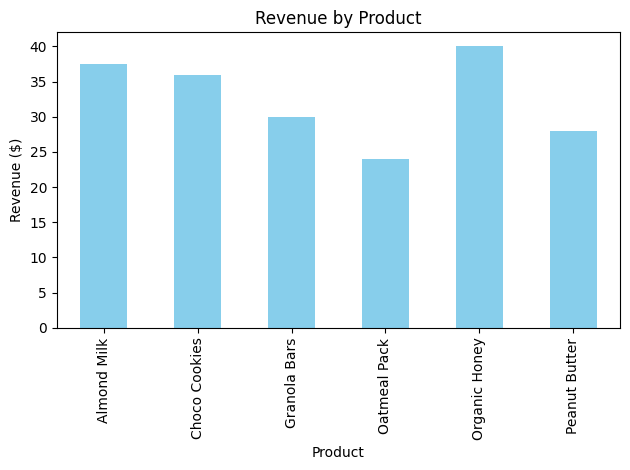

In [21]:
# Revenue by Product
plt.figure(figsize=(8, 5))
df1.plot(kind='bar', x='product', y='total_revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("revenue_by_product.png")
plt.show()



<Figure size 800x500 with 0 Axes>

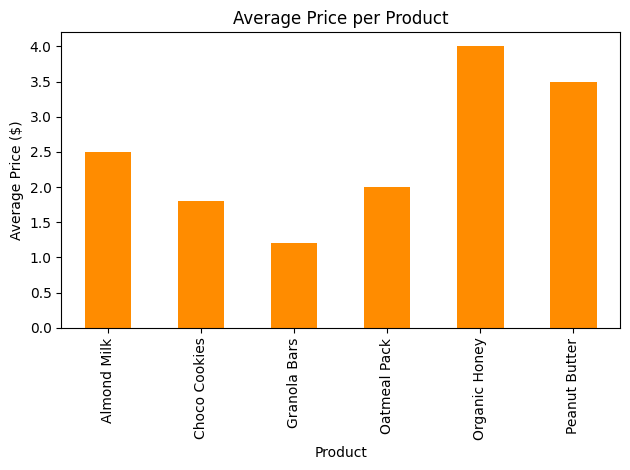

In [22]:
# Average Price per Product
plt.figure(figsize=(8, 5))
df2.plot(kind='bar', x='product', y='avg_price', legend=False, color='darkorange')
plt.title("Average Price per Product")
plt.xlabel("Product")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("avg_price_by_product.png")
plt.show()

<Figure size 800x500 with 0 Axes>

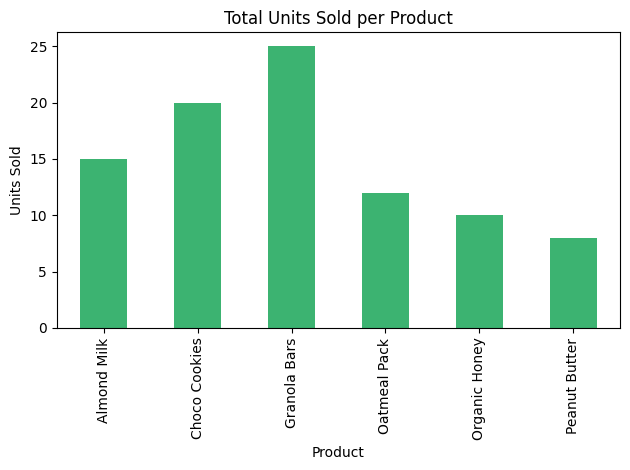

In [24]:
# Total Units Sold per Product
plt.figure(figsize=(8, 5))
df2.plot(kind='bar', x='product', y='total_units', legend=False, color='mediumseagreen')
plt.title("Total Units Sold per Product")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.savefig("units_sold_by_product.png")
plt.show()


In [26]:
#Closing the connection
conn.close()